<a href="https://colab.research.google.com/github/heidilyu/Advanced-Calculus-/blob/main/Prelab_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Lab 2.4

Goals:

* Generate random data using numpy.
* Generate histograms using matplotlib.
* Determine how the average of a sample of a random variable behaves.


In this lab we're going to generate random data and display it.  First we'll need to import libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Random Variables

Python can use the `numpy.random` library to sample random variables.  For instance the code below samples a normal random variable ($\mu=0$, $\sigma=1$).

In [ ]:
np.random.normal()

### Exercise 1

* Run the code a few times.  Notice that it is giving a different output every time.
* Let's add some key values as arguments. Try each of the following:
 * `loc=2` moves the mean to $\mu=2$.
 * `scale=3.2` changes the standard deviation to $\sigma=3.2$.
 * `size=10` outputs an array of 10 samples instead of just one.

## Histograms

Histograms are a way of presenting a list of numbers.  They divide the range of values into bins, and then indicate how many of the numbers lie in each bin.  The `plt.hist()` method figures out the range and the bins and does the counting for us.  We'll do this on an axis so that we have access to titles and other fun stuff.

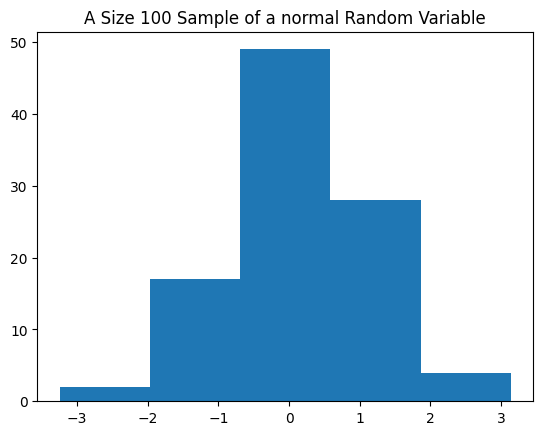

In [ ]:
# Make an array that contains 100 samples of a normal random variable
sample= np.random.normal(size=100)

#Define an axis
ax=plt.axes()

#Plot a histogram on that axis
ax.hist(sample, bins=5)

#add a title to the axis
ax.set_title('A Size 100 Sample of a normal Random Variable')

#show the current axis
plt.show()

`plt.hist()` has made a graphical representation of our sample.  Notice it doesn't need an input and output array.  It takes a single array, and the output is the number of elements in each bin.  

This histogram isn't detailed enough to tell us much about the normal random variable, but some quick changes should fix that.

### Exercise 2

* Run this code cell over and over, to confirm that it is generating new random data each time.

* Change this code to give a size 1000000 sample.  Does the histograph vary as much when you run it repeatedly?

* Experiment with the `bins=` parameter in the `plt.hist` function.  Can you get a more compelling shape with a number different than 5?

* Add the keyvalue `edgecolor=black` to `plt.hist()` so you can see the edges of the rectangles.

* How does the histogram relate to the density function of a normal random variable when the sample is large and the number of bins is high?


## The Density Function of the Normal Random Variable

The previous exercise had you creating a histogram that looks like a bell curve, the probability density function of a normal random variable.  We will confirm that with a graph.  The PDF of the normal random variable is available in the `scipy` package.  This code will import it.

In [ ]:
from scipy.stats import norm

We now have access to the method `norm.pdf()`.  It takes three positional arguments
* The x value you want to plug into the function
* mu, the average of the normal random variable
* sigma, the standard deviation of the random variable

<function matplotlib.pyplot.show(close=None, block=None)>

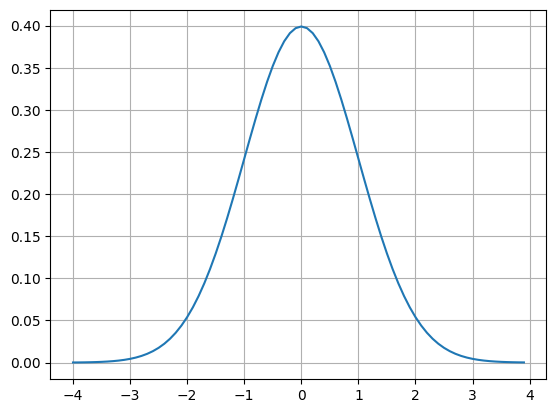

In [ ]:
x=np.arange(-4,4,0.1)
mu=0
sigma=1
y=norm.pdf(x,mu,sigma)

ax=plt.axes()
ax.plot(x,y)
ax.grid()
plt.show

We could put our histogram and pdf on the same axes, but we shouldn't expect their heights to match.  Their heights are in different units (# of observations per bin vs density of probability per x).  However, we can get around this by mutiplying our pdf by a constant.

### Exercise 3
In a code cell below, produce a graph containing of a histogram and its matching pdf:
* Save a sample of size 10000 from a normal random variable with $\mu=2$ and $\sigma=3.2$ to the variable `sample`.
* To the variable `x`, save an array of appropriately chosen x-values
* Apply the `normal.pdf()` function to `x`, with appropriate arguments and save it as `y`
* Define an axis using `plt.axes()` and plot both a histogram of `samples` and the curve `x,y` on this axis.  Add a grid if you want.
* Show your graph.  Does the height of your pdf match the height of your histogram?  No.  Should this bother you? No.  Multiply `y` by an appropriate constant to adjust its height and rerun the cell.  Use trial and error until you get soemthing you're happy with.

## Averages of a Sample

Suppose we sample our variable and take the average.  This average is itself a random variable.  We'll be exploring how this random variable behaves.

With say 10000 samples, the average of the sample should be very close to the average value of our normal random variable, but it's unlikely to be exactly 0.

### Exercise 4
In a code cell
* Assign an array of 10000 samples of a normal random variable to the variable `sample`.
* Use `np.average()` to output the average of `sample`.
* Run it a few times.  Notice that your average stays very close to 0.

Congratulations!  You have created your own random variable.  You can run that code block again and again to sample it over and over.  The `np.random.normal()` method was convenient, because the size keyvalue let is generate a sample of any size we wanted.  The code cell above only computed one average for us.

Let's write a function that does this with our new variable.  This will be our first function with a key value.  The syntax is
> `key=default value`

placed in the arguments of the `def` statement.  We'll use two.  The number of samples to average, and the size of the array of averages we wish to create.

In [ ]:
def sampleaverage(samples=1,averages=1): #samples=number of normal RV to average, averages=number of averages to return
  averagesarray=np.array([]) # make an empty array
  sample=np.random.normal(size=samples) # take a sample of size samples
  for i in range(averages): # notice i is a dummy variable
    x=np.average(sample) #average the elements of sample
    averagesarray=np.append(averagesarray,x) #append the average x to averagesarray and save it back to averagesarray
  return averagesarray


In [ ]:
sampleaverage(samples=10, averages=15)

### Exercise 5

* Execute this function for 100 samples in each average, creating an array of size 10.  What do you notice?
* Obviously this isn't working.  One of the instructions is misplaced.  Explain why and fix it.